# Execute the Graph-Based Spatial Cross-Validation experiments from ICMLA21 Paper

## 1 - Initialize libraries

In [1]:
import os
import pandas as pd
from src import utils
from src.visualization.performance import VizMetrics
#from src.visualization.dependence import VizDependence

## 2 - Initialize loggers

In [2]:
utils.initialize_coloredlog()
utils.initialize_rich_tracerback()
utils.initialize_logging()

## 3 - Initialize working path and enviromental variables

In [5]:
# Project path
project_dir = os.path.abspath('')[:-5]
# Load enviromental variables
env_var = utils.load_env_variables(project_dir)
env_var["root_path"] = "/home/tpinho/IJGIS/Datasets/Brazil_Election_2018"

## 4 - Load the data

In [6]:
dataset = "Original"
#dataset = "US_Wheat_Yield_2014"
# Set paths
adj_path = os.path.join(env_var["root_path"], dataset, "normd_matrix.csv")

# Load data
adj_matrix = pd.read_csv(adj_path, low_memory=False)
# Set adjacency matrix index
adj_matrix.set_index(adj_matrix.columns[0], inplace=True)
adj_matrix = 1 - adj_matrix 

## 7 - Generate plots
OBS: The plots generate will be in the created folder comparison in the data directory 

### 7.1 Generate performance plots

In [9]:
viz_metrics = VizMetrics(
    root_path=os.path.join(env_var["root_path"], dataset),
    cv_methods=["RBuffer"],
    index_col="FOLD",
    fs_method="CFS_Local_Meta_All_OLS",
    ml_method="MLP",
)
print("Generating performance plots...")
viz_metrics.run()

2022-06-09 13:24:01 labics01 root[7460] INFO Generating mean table.


Generating performance plots...


╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-9-136ccb1eb019>:9 in <module>                                              │
│ /home/tpinho/IJGIS/Graph-Based_Spatial_Cross_Validation/src/visualization/performance.py: │
│ 148 in run                                                                                │
│                                                                                           │
│   145 │   │   self.set_logger_to_crit("matplotlib")                                       │
│   146 │   │   self.init_methods_path()                                                    │
│   147 │   │   self.load_cv_results()                                                      │
│ ❱ 148 │   │   self.generate_mean_table()                                                  │
│   149 │   │   self.generate_metric_plot()                                                 │
│   150 │   │   self.tukey_post_hoc_test("RMSE")                                            │
│   151                                                                                     │
│                                                                                           │
│ /home/tpinho/IJGIS/Graph-Based_Spatial_Cross_Validation/src/visualization/performance.py: │
│ 120 in generate_mean_table                                                                │
│                                                                                           │
│   117 │   def generate_mean_table(self):                                                  │
│   118 │   │   """Generates the mean performance for each spatial cv approache"""          │
│   119 │   │   self.logger_info("Generating mean table.")                                  │
│ ❱ 120 │   │   columns = self.cv_methods_results["Optimistic"].columns.values.tolist()     │
│   121 │   │   columns_std = [f"{col}_std" for col in columns]                             │
│   122 │   │   columns = columns + columns_std                                             │
│   123 │   │   columns = columns.sort()                                                    │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Optimistic'

### 7.2 Generate dependence plot

Generating dependence plot...


100%|██████████| 3/3 [00:29<00:00,  9.69s/it]


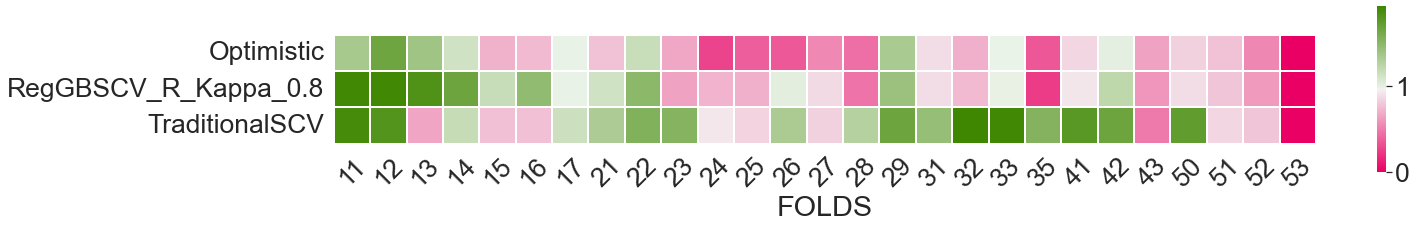

In [6]:
data = pd.read_csv(os.path.join(env_var["root_path"], dataset, "data.csv"))
viz_dependence = VizDependence(
    root_path=os.path.join(env_var["root_path"], dataset),
    cv_methods=["Optimistic", "RegGBSCV_R_Kappa_0.8", "TraditionalSCV"],
    index_col="INDEX",
    fold_col="INDEX_FOLDS",
    target_col="TARGET",
    adj_matrix=adj_matrix,
    prob=0.95,
    fold_list=data["INDEX_FOLDS"].unique(),
    paper=False,
)
print("Generating dependence plot...")
viz_dependence.run()